In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
"""
Görüntü işlemde morfolojik işlem, görüntülerdeki yapısal öğeleri inceleyen ve manipüle eden işlemler grubuna verilen addır. 
Bu işlemler genellikle ikili (binary) veya gri tonlamalı görüntüler üzerinde gerçekleştirilir ve şekil, boyut, yapı gibi özellikleri 
çıkarmaya veya değiştirmeye yönelik matematiksel tekniklerdir. Morfolojik işlemler, özellikle nesne sınırlarını, şekil özelliklerini ve bağlantıları 
analiz etme ve iyileştirme amacıyla kullanılır.
"""

Text(0.5, 1.0, 'EROSION Image')

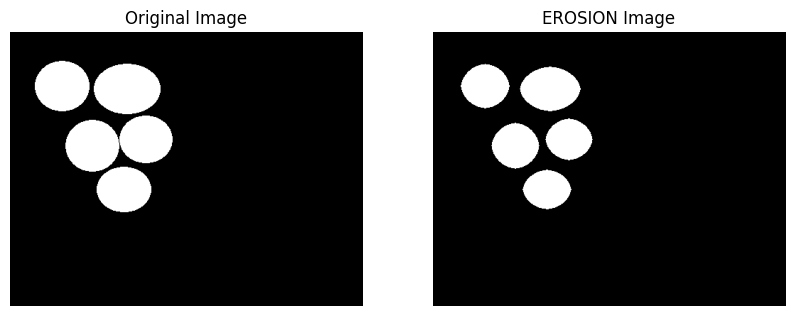

In [11]:
# Erosion (Aşınma): siyah beyaz görüntülerde beyaz rengini temsil eden
# piksellerin daha da küçültülmesi işlemini yapar.

my_original_img = cv2.imread("./binary.png",0)

my_kernel = np.ones((5,5),dtype=np.uint8)

my_erosion_img = cv2.erode(my_original_img, my_kernel, iterations=2)

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(my_original_img, cmap="gray")
plt.axis('off')
plt.title("Original Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(my_erosion_img, cmap="gray")
plt.axis('off')
plt.title("EROSION Image")

In [5]:
my_kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [ ]:
# Genişleme (Dilation); Erosion işleminin tam tersidir. Görüntüdeki beyaz
# rengi temsil eden piksellerin büyümesini, genişlemesini sağlar.

my_dilation_img = cv2.dilate(my_original_img, my_kernel, iterations=2)

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(my_original_img, cmap="gray")
plt.axis('off')
plt.title("Original Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(my_erosion_img, cmap="gray")
plt.axis('off')
plt.title("EROSION Image")

fig.add_subplot(rows, columns, 3)
plt.imshow(my_dilation_img, cmap="gray")
plt.axis('off')
plt.title("DILATION Image")

In [23]:
# Açma/Açılma (Opening) İşlemi: Önce erosion sonra da dilation işlemlerinin
# arka arkaya uygulanması ile elde edilir.
# Burada amaç, beyaz piksellerin neden olduğu gürültünün temizlenmesidir.
# Görüntü işlemede gürültü, görüntüde istenmeyen piksellerdir.
# Tıpkı bir müzik dinlerken araya cızırtı seslerinin girmesi gibi.

new_img = cv2.imread("./binary_with_text.png",0)

white_noise = np.random.randint(0,2,size=new_img.shape[0:2])
white_noise = white_noise*255

Text(0.5, 1.0, 'WHITE AND BLACK Image')

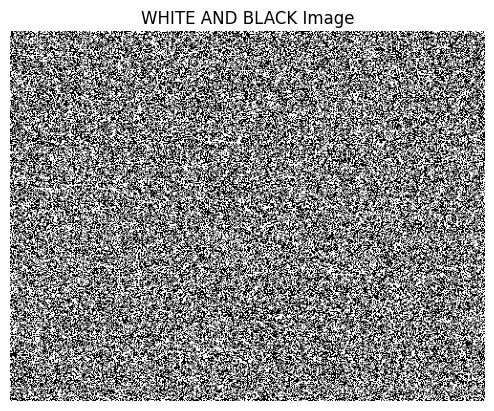

In [25]:
plt.imshow(white_noise, cmap="gray")
plt.axis('off')
plt.title("WHITE AND BLACK Image")

Text(0.5, 1.0, 'EROSION Image')

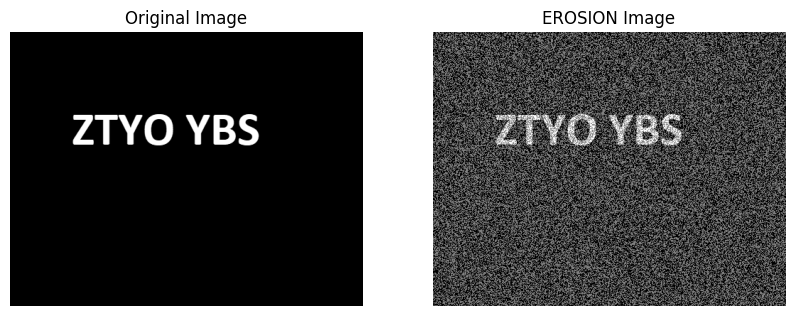

In [27]:
my_noised_img = new_img + white_noise

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(new_img, cmap="gray")
plt.axis('off')
plt.title("Original Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(my_noised_img, cmap="gray")
plt.axis('off')
plt.title("NOISED Image")

In [33]:
my_opening_img = cv2.morphologyEx(my_noised_img.astype(np.float32), 
                                  cv2.MORPH_OPEN, my_kernel)

Text(0.5, 1.0, 'OPENING Image')

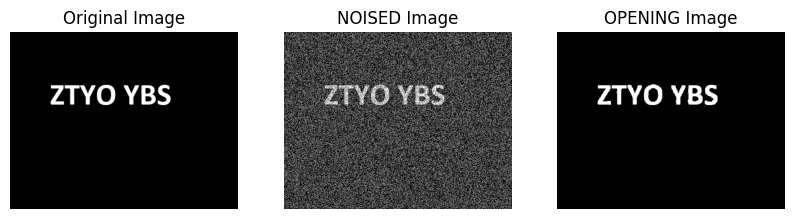

In [35]:
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(new_img, cmap="gray")
plt.axis('off')
plt.title("Original Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(my_noised_img, cmap="gray")
plt.axis('off')
plt.title("NOISED Image")

fig.add_subplot(rows, columns, 3)
plt.imshow(my_opening_img, cmap="gray")
plt.axis('off')
plt.title("OPENING Image")

In [ ]:
# 4. morfolojik işlem: Closing (Kapatma/Kapama), bu da opening işleminin
# tam tersidir. Görüntüye önce genişleme sonra erozyon işlemini uygular.


Text(0.5, 1.0, 'MY BLACK NOISED IMAGE')

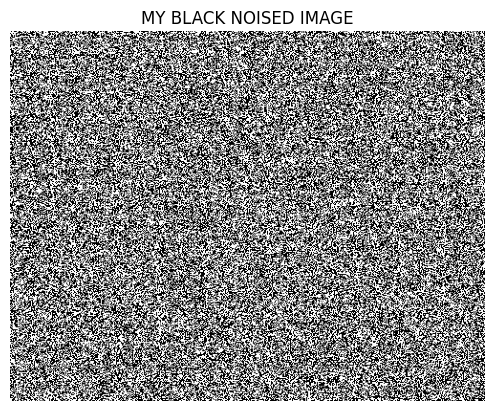

In [37]:
my_black_noise = np.random.randint(0,2, size=my_original_img.shape[:2])
my_black_noise =my_black_noise * -255

plt.imshow(my_black_noise,cmap="gray")
plt.axis("off")
plt.title("MY BLACK NOISED IMAGE")

In [39]:
my_black_noised_img = my_black_noise + new_img
print(np.min(my_black_noised_img))
print(np.max(my_black_noised_img))

-255
255


In [41]:
my_black_noised_img[my_black_noised_img <= -245] = 0
print(np.min(my_black_noised_img))
print(np.max(my_black_noised_img))

-234
255


In [43]:
my_closing_img = cv2.morphologyEx(my_black_noised_img.astype(np.float32), 
                                  cv2.MORPH_CLOSE, my_kernel)

Text(0.5, 1.0, 'CLOSING Image')

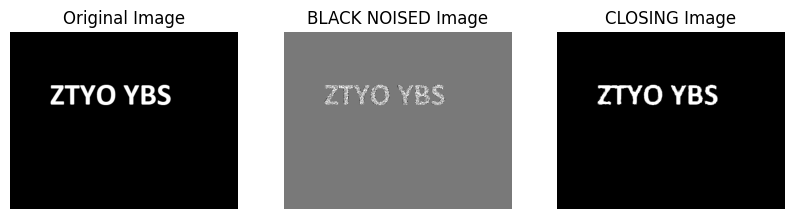

In [45]:
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(new_img, cmap="gray")
plt.axis('off')
plt.title("Original Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(my_black_noised_img, cmap="gray")
plt.axis('off')
plt.title("BLACK NOISED Image")

fig.add_subplot(rows, columns, 3)
plt.imshow(my_closing_img, cmap="gray")
plt.axis('off')
plt.title("CLOSING Image")

In [47]:
# 5. morfolojik işlem gradient (gradyan) işlemi:
# Matematikte gradyan, bir fonksiyonun değişim hızını ve yönünü veren
# vektördür. Görüntü işlemede gradyan ise, bir görüntünün yoğunluk değişimini
# temsil eder. Bir pikselden başka bir piksele geçerken yaşanan değişimlerin
# büyüklüğünü verir. Bu işlem genellikle, kenar tespit işleminde kullanılır

my_gradient_img_1 = cv2.morphologyEx(my_original_img, cv2.MORPH_GRADIENT, 
                                     my_kernel)
my_gradient_img_2 = cv2.morphologyEx(new_img, cv2.MORPH_GRADIENT, my_kernel)

Text(0.5, 1.0, 'GRADIENT Image 2')

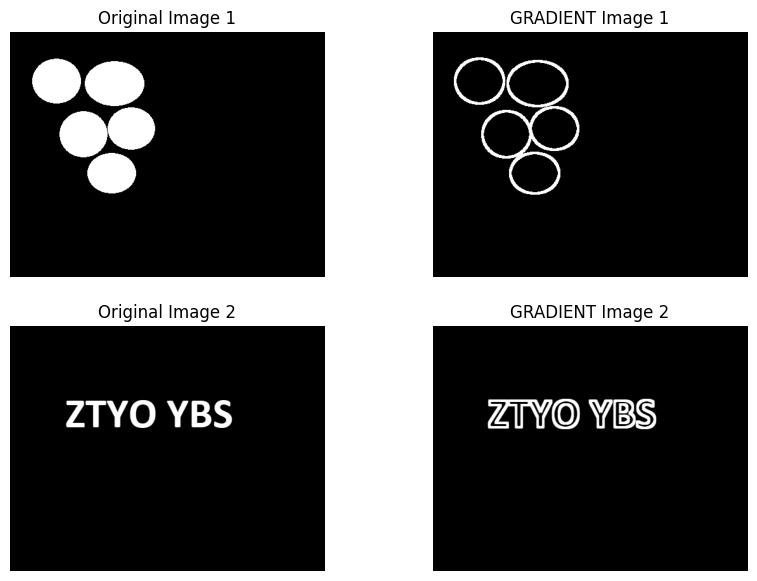

In [49]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(my_original_img, cmap="gray")
plt.axis('off')
plt.title("Original Image 1")

fig.add_subplot(rows, columns, 2)
plt.imshow(my_gradient_img_1, cmap="gray")
plt.axis('off')
plt.title("GRADIENT Image 1")

fig.add_subplot(rows, columns, 3)
plt.imshow(new_img, cmap="gray")
plt.axis('off')
plt.title("Original Image 2")

fig.add_subplot(rows, columns, 4)
plt.imshow(my_gradient_img_2, cmap="gray")
plt.axis('off')
plt.title("GRADIENT Image 2")